#                                 # Sentiment- Analysis-Twitter

#### Introduction:   ( Only for reference of definitions:)

##### 1. Characteristic features of Tweets:                                                                                         
Length of a Tweet: The maximum length of a Twitter message is 140 characters. This means that we can practically consider a tweet to be a single sentence                                                                               
Language :used Twitter is used via a variety of media including SMS and mobile phone apps. Because of this and the 140-character limit, language used in Tweets tend be more colloquial, and filled with slang and misspellings. Use of hashtags also gained popularity on Twitter and is a primary feature in any given tweet. Our analysis shows that there are approximately 1-2 hashtags per tweet .                                                                                   
Data availability: Another difference is the magnitude of data available. With the Twitter API, it is easy to collect millions of tweets for training. There also exist a few datasets that have automatically and manually labelled the tweets.  
Domain of topics: People often post about their likes and dislikes on social media. These are not al concentrated around one topic. This makes twitter a unique place to model a generic classifier as opposed to domain specific classifiers that could be build datasets such as movie reviews
#####  2.Data sets:   Twitter Sentiment Corpus
Illustration of Tweets in this corpus                                                                                   
Negative                                                                                                                   
Positive
##### 3.Main Features:    
Retweet symbol                                                                                                       
URL                                                                    
Hashtags
Emotion                                                                                                                  
Handle                                                                                                            
Punctuations
          

# MIE 1624: Introduction to Data Science and analytics

## 1.Importing required libraries  and methods

In [1]:
#Downloading required packages
!pip install wordcloud
!pip install gensim
!pip install xgboost

In [2]:
#Importing necessary packages, functions 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import seaborn as sns
from wordcloud import WordCloud
import re
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
try:
    from gensim.models import word2vec
except:

    from gensim.models import word2vec
nltk.download("stopwords")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  2. Data Cleaning

### Importing and cleaning data.

Before performing any analyses, the all text data must be cleaned and prepared for model usage. For this assignment, two major sets of data are being used. The first is the gen_tweets(sentiment.csv) dataset, which includes 133811 tweets that are classified as either negative,  positive ,neutral sentiments. The elect_tweets dataset includes the 2019 Canadian election tweets that will need further analysis.

### 2.1 Importing Data Sets

a.First, the sentiment and canadian_elections_2019 datasets are imported using the read_csv function from pandas.          
Also importing stop words.csv

In [3]:
#Importing datasets and stop words
gen_df=pd.read_csv('Sentiment.csv')
elec_df=pd.read_csv('canadian_elections_2019.csv')
stop_df=pd.read_csv('stop_words.txt',header=None)

In [4]:
# Previewing the sentiment tweet  dataset.
gen_df.head()

,sentiment,text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great
3,Positive,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...


In [5]:
# Previewing the unclassified_tweets dataset.
elec_df.head()

,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


b.From the above 5 rows we can observe some data cleaning requirements.                                                    
Before that Observe the labels of the sentiments data as we need two classes negative and positive

In [6]:
#Check the labels/classes of classified data
gen_df.groupby('sentiment').sentiment.count()

sentiment
Negative    71428
Neutral      3142
Positive    59241
Name: sentiment, dtype: int64

In [7]:
#check the labels/classes of 
elec_df.groupby('sentiment').sentiment.count()

sentiment
Negative    1006
Positive    1127
Name: sentiment, dtype: int64

c.We need only data of labels having positive and negative sentiments so delete neutral sentiment tweets in gen_df                 
And also the label indexes are mixed and are not in order. 

In [8]:
gen_df[(gen_df.sentiment!='Negative')&(gen_df.sentiment!='Positive')].head()

,sentiment,text
212,Neutral,I pray God gives these candidates more direct ...
214,Neutral,Early figures show TV ratings for the #GOPDeba...
241,Neutral,"Goodness, @CharmaineYoest &amp; I were there a..."
255,Neutral,"Amen, lets elect our next President on their f..."
338,Neutral,RT @MadisonSiriusXM: Did you watch the Republi...


In [9]:
gen_df =gen_df.drop(gen_df[(gen_df.sentiment!='Negative')&(gen_df.sentiment!='Positive')].index).reset_index(drop=True)


In [10]:
gen_df.groupby('sentiment').sentiment.count()

sentiment
Negative    71428
Positive    59241
Name: sentiment, dtype: int64

d.Check the length of the string in text column in each entry for both gen_df and elec_df datasets.

In [11]:
gen_df['pre_clean_len'] = [len(str(t)) for t in gen_df.text]

gen_df[gen_df.pre_clean_len > 140].head()

,sentiment,text,pre_clean_len
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,146
48,Positive,@miss_tattoo LOL! cuuuute! how did the M&amp;...,142
96,Negative,RT @Just_JDreaming: Fox to Presidential Candid...,142
127,Negative,"RT @larryelder: Trump was ""railroaded"" by FOX?...",142
179,Negative,RT @TrawlingTroll: @CarlyFiorina was the winne...,142


In [12]:
elec_df['pre_clean_len'] = [len(str(t)) for t in elec_df.text]

elec_df[elec_df.pre_clean_len > 140].head()

,sentiment,negative_reason,text,pre_clean_len
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",285
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",309
5,Negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",280
6,Positive,NaN,"b""#CDNmedia #elxn43 #cdnpoli #PPC Rocky Dong h...",189
7,Positive,NaN,"b""#cdnpoli #elxn43 The Liberals ++ more than d...",283


The above understanding of the data concludes that the data needs cleaning

e.As we see that our labelled data is string we will convert them into numerical and use label encoding on both the data sets

In [13]:
#Label encoding for column sentiments.
gen_df['sentiment_coded']=[0 if gen_df['sentiment'][i]=='Negative' else 4 for i in range(len(gen_df))]
elec_df['sentiment_coded']=[0 if elec_df['sentiment'][i]=='Negative' else 4 for i in range(len(elec_df))]


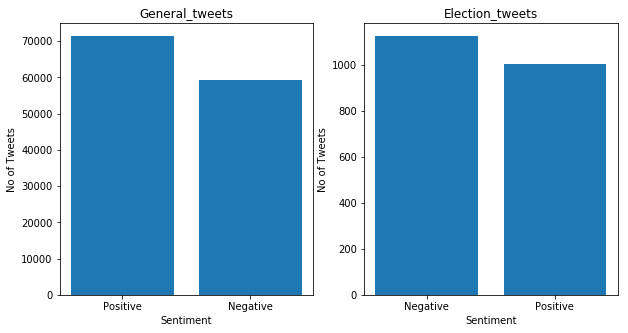

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.bar(gen_df['sentiment'].unique(),gen_df['sentiment'].value_counts())
ax2.bar(elec_df['sentiment'].unique(),elec_df['sentiment'].value_counts())
ax1.set_title('General_tweets')
ax2.set_title('Election_tweets')
for ax in [ax1,ax2]:
    ax.set(xlabel='Sentiment', ylabel='No of Tweets')


It is observed that in both the datasets there are more negative tweets.

### 2.2 Cleaning General tweets dataframe

#### 2..1 Converting all tweets to lower case

In [15]:
#### Function to convert letters of tweet to lowercase
def lower_fn(text):
    lower_case = str(text).lower()
    return(lower_case)

In [16]:
#converting all letter to lowercase for generaltweets dataset
gen_df['lower']=gen_df['text'].apply(lower_fn)

In [17]:
gen_df.head()

,sentiment,text,pre_clean_len,sentiment_coded,lower
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,146,4,rt @diplomtc_immnty: @realdonaldtrump they tri...
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...",82,0,"@chiefy74 damn i'm jealous, i wanna watch the ..."
2,Positive,I'm listening The Beatles now. They're great,45,4,i'm listening the beatles now. they're great
3,Positive,@ddlovato could i please get a shout out or an...,99,4,@ddlovato could i please get a shout out or an...
4,Positive,@salspizza just spotted ur message there Tony ...,63,4,@salspizza just spotted ur message there tony ...


#### 2.2.2 URL  and Webaddresses and Handles

Now we need to remove any URLs. This is difficult to define a standard regex case as URLs have various representations. Therefore, the assumption is taken that all links are captured such that they follow ".(anything a-z)". From that, all non-white space before and after the ".(anything a-z)" will be captured as well. This allows capturing all domain extensions, while also including links with, or without "www." and "http://". 

In [18]:
#Function for removing web addresses with www and http and single alphabets and handles
def url_handles(lower):
        clean_url=re.sub(r"http\S+", "", lower)
        clean_url=re.sub(r"www.\S+", "", clean_url)
        clean_url=re.sub(r'@[_A-Za-z0-9]+','',clean_url)
        return(clean_url)

In [19]:
#cUsing url_handles function to remove url and handles(@user)
gen_df['clean_url']=gen_df['lower'].apply(url_handles)

#### 2.2.3  HTML tags and other characters are removed

a.Next, html tags are removed from both datasets by capturing all possible cases using a regex value.
Method-1
Now all HTML character codes need to be replaced with their ASCII equivalent. In order to do this, 4 unique HTML character code instances were found by analyzing the datasets prior to hard coding the replacement, using the commented positive lookahead/lookbehind regex value.

Method-2
Python's html.unescape function, which takes care of all HTML character replacements can also be used
Convert all named and numeric character references (e.g. &gt;, &#62;, &#x3e;) in the string s to the corresponding Unicode characters.

We choose method-1 

In [20]:
# Function for Removing html tags by giving input column(lower)
def html_clean(clean_url):
        clean_html=clean_url.replace("\\n", "")
        clean_html=(clean_html.encode('ascii', 'ignore')).decode("utf-8") #to remove emojis byte codes
        clean_html = re.sub(r"[,@\?\\.$%_\\\']", "", clean_html)
        clean_html=BeautifulSoup(clean_html, 'lxml').get_text()
        return(clean_html)

In [21]:
#Using clean_html function to remove html tags and characters
gen_df['clean_html']=gen_df['clean_url'].apply(html_clean)

In [22]:
gen_df.clean_html.head()

0    rt :  they tried to take you out & your poll n...
1    damn im jealous i wanna watch the fight  i lov...
2           im listening the beatles now theyre great 
3    could i please get a shout out or anything im ...
4    just spotted ur message there tony and have re...
Name: clean_html, dtype: object

#### 2.2.4 Splitting sentences into words using tokenizer (method tokenize)

In [23]:
# Function for Splitting sentences into words using tokens
def word_split(clean_html):
        tokenizer = RegexpTokenizer(r'\w+')         
        b = tokenizer.tokenize(clean_html)
        return(b)

In [24]:
gen_df['token_words']=gen_df['clean_html'].apply(word_split)

In [25]:
gen_df.token_words.head()

0    [rt, they, tried, to, take, you, out, your, po...
1    [damn, im, jealous, i, wanna, watch, the, figh...
2    [im, listening, the, beatles, now, theyre, great]
3    [could, i, please, get, a, shout, out, or, any...
4    [just, spotted, ur, message, there, tony, and,...
Name: token_words, dtype: object

#### 2.2.5 Stemming and removing stop words before 

Stemming and Lemmatization are Text Normalization (or sometimes called Word Normalization) techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.
                                                                                         
1.Stemming:                                                                                                               
"Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."& computer program  stems word may be called a stemming program, stemming algorithm, or stemmer.                                                                                   
Stemming Algorithms:(we use gutenberg corpora for stemming)(faster)                                                        
PorterStammer or LancasterStammer:PorterStemmer uses Suffix Stripping(Removing suffixes from a word) to produce stems      
Porter Stemmer.PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are    applied in  (step by step) to generate stems.                                                                             
LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. Over-stemming causes the stems to be not linguistic, or they may have no meaning.

2.Lematization:(wordnet corporus and stop word corporus is needed.(slower)
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language.    In Lemmatization root word is called Lemma. A lemma is the canonical form, dictionary form, or citation form of a set of    words.

stop words: Stop Words are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. Each programming language will give its own list of stop words to use.(can be downloaded from ntlk package)

We can also not remove stop words and do stemming we can ask stemmer to ignore stop words.

In [26]:
# Function to removing stop words using the two sets(stop_words1 from nltk) and (stop_words2 from given list)
stop_words1=set(stopwords.words('english'))
stop_words2=set(stop_df[0].values)
def words_stop(token_words):
        clean_stop = [word for word in token_words if word not in stop_words1]#removing words not in english
        clean_stop = [word for word in clean_stop if word not in stop_words2]#removing words that are not in list given
        return(clean_stop)

In [27]:
gen_df['clean_stop']=gen_df['token_words'].apply(words_stop)

In [28]:
gen_df.clean_stop.head()

0    [rt, poll, numbers, skyrocketed, voters, matte...
1      [damn, jealous, wanna, watch, fight, love, ufc]
2                          [listening, beatles, great]
3                   [shout, huge, fan, cant, wait, cd]
4                [spotted, ur, message, tony, replied]
Name: clean_stop, dtype: object

In [29]:
# Function to get stem words from the given clean_stop and converted as a string
def stemmer(clean_words):
    ps = PorterStemmer()
    stem_sentence=[]
    for word in clean_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [30]:
gen_df['cleaned_text']=gen_df['clean_stop'].apply(stemmer)

In [31]:
gen_df.head(2)

,sentiment,text,pre_clean_len,sentiment_coded,lower,clean_url,clean_html,token_words,clean_stop,cleaned_text
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,146,4,rt @diplomtc_immnty: @realdonaldtrump they tri...,rt : they tried to take you out &amp; your po...,rt : they tried to take you out & your poll n...,"[rt, they, tried, to, take, you, out, your, po...","[rt, poll, numbers, skyrocketed, voters, matte...",rt poll number skyrocket voter matter moder
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...",82,0,"@chiefy74 damn i'm jealous, i wanna watch the ...","damn i'm jealous, i wanna watch the fight i ...",damn im jealous i wanna watch the fight i lov...,"[damn, im, jealous, i, wanna, watch, the, figh...","[damn, jealous, wanna, watch, fight, love, ufc]",damn jealou wanna watch fight love ufc


In [32]:
#check the post cleaned length of cleaned_tweets
gen_df['post_clean_len'] = [len(str(t)) for t in gen_df.cleaned_text]

In [33]:
#Delete other rows created do ease all function visUALIZATIONS
gen_df=gen_df.drop(['lower','clean_url','clean_html','token_words','clean_stop'],axis=1)

### 2.2.6 Cleaned _text of the dataset general tweets(sentiments.csv)

In [34]:
gen_df.head()

,sentiment,text,pre_clean_len,sentiment_coded,cleaned_text,post_clean_len
0,Positive,RT @Diplomtc_Immnty: @realDonaldTrump They tri...,146,4,rt poll number skyrocket voter matter moder,44
1,Negative,"@chiefy74 Damn i'm jealous, i wanna watch the ...",82,0,damn jealou wanna watch fight love ufc,39
2,Positive,I'm listening The Beatles now. They're great,45,4,listen beatl great,19
3,Positive,@ddlovato could i please get a shout out or an...,99,4,shout huge fan cant wait cd,28
4,Positive,@salspizza just spotted ur message there Tony ...,63,4,spot ur messag toni repli,26


### 2.3 Data Cleaning of Election tweets(canadian_elections_2019.csv)

Cleaning of election data set is not completely same as general tweets dataset.                                            
1.We need to use twitter id's(handles) and hashtags  for classification of tweets with respect to political parties.       
2.First we will remove html tags,emoji's unicode and convert to lower case.                                               
3.Secondly we delaing with hashtags,handles,tokeninzing and stemming.                                                      

In [35]:
elec_df.isna().sum()

sentiment             0
negative_reason    1126
text                  0
pre_clean_len         0
sentiment_coded       0
dtype: int64

Negative reason have null values because reasoning is only given for Negative labels  and the positive labels doesnot have any.

#### 2.3.1  Converting  letters to lowercase

In [36]:
#using functions lower_fn
def lower_fun(text):
    lower_case = text.lower()
    return(lower_case)
elec_df['lower']=elec_df['text'].apply(lower_fun)

In [37]:
elec_df.lower.head()

0    b"@rosiebarton so instead of your suggestion, ...
1    b"#allwomanspacewalk it's real!\n@space_statio...
2    b"#brantford it's going to cost you $94 billio...
3    b"#canada #canadaelection2019 #canadavotes \n#...
4    b"#canada #taxpayers are sick &amp; tired of h...
Name: lower, dtype: object

#### 2.3.2 URL and Webaddresses

In [38]:
#Function for election tweets
def web_url(text):
        clean_url=re.sub(r"http\S+", "", text)
        return(clean_url)

In [39]:
elec_df['clean_url']=elec_df['lower'].apply(web_url)

In [40]:
elec_df.clean_url.head(3)

0    b"@rosiebarton so instead of your suggestion, ...
1    b"#allwomanspacewalk it's real!\n@space_statio...
2    b"#brantford it's going to cost you $94 billio...
Name: clean_url, dtype: object

#### 2.3.3  Remove html tags,new line characters(\n) and emoji unicodes

In [41]:
#We observe 'b 'in the leading of the tweet so split it and remove


In [42]:
def html_tags(text):
        clean_html=text[2:-1]#get the tweet and leave 'b'
        clean_html=" ".join(filter(lambda x:x[0]!='\\',clean_html.split()))#split the tweet and remove'b'
        clean_html=(clean_html.encode('ascii', 'ignore')).decode("utf-8") #to remove emojis byte codes
        clean_html=clean_html.replace("\\n", "")
        clean_html= re.sub(r"[,\?\.$\\%_\\\']", "", clean_html)#to remove emoji codes
        clean_html=BeautifulSoup(clean_html, 'lxml').get_text()
        return(clean_html)
    

In [43]:
#Using html_tags function to remove html tags,emojis and characters
elec_df['clean_html']=elec_df['clean_url'].apply(html_tags)

In [44]:
elec_df.clean_html.head()

0    @rosiebarton so instead of your suggestion how...
1    #allwomanspacewalk its real!@spacestation #cit...
2    #brantford its going to cost you 94 billion fo...
3    #canada #canadaelection2019 #canadavotes decid...
4    #canada #taxpayers are sick & tired of having ...
Name: clean_html, dtype: object

#### 2.3.4 Remove handles and hashtags,tokenize,remove stop words and stemming

In [45]:
def final_clean(text):
    
        #Removing handles, hashtags
        clean_handles=re.sub(r'@[_A-Za-z0-9]+','',text)

        #Splitting sentences into words using tokens
        tokenizer = RegexpTokenizer(r'\w+')         
        b = tokenizer.tokenize(clean_handles)

        #Removing stop words
        clean_stop = [word for word in b if word not in stop_words1]
        clean_Stop = [word for word in clean_stop if word not in stop_words2]

        #Converting words to root(stem) words
        ps = PorterStemmer()
        stem_sentence=[]
        for word in clean_stop:
                stem_sentence.append(ps.stem(word))
                stem_sentence.append(" ")
        return "".join(stem_sentence)
        
   

In [46]:
elec_df['cleaned_text']=elec_df['clean_html'].apply(final_clean)

In [47]:
elec_df.head(2)

,sentiment,negative_reason,text,pre_clean_len,sentiment_coded,lower,clean_url,clean_html,cleaned_text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",285,0,"b""@rosiebarton so instead of your suggestion, ...","b""@rosiebarton so instead of your suggestion, ...",@rosiebarton so instead of your suggestion how...,instead suggest agre canadian women trust andr...
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",125,4,"b""#allwomanspacewalk it's real!\n@space_statio...","b""#allwomanspacewalk it's real!\n@space_statio...",#allwomanspacewalk its real!@spacestation #cit...,allwomanspacewalk real cityofto onpoli cdnpoli...


In [48]:
#check the post cleaned length of cleaned_tweets
elec_df['post_clean_len'] = [len(str(t)) for t in elec_df.cleaned_text]

In [49]:
#Drop unneccesary columns
elec_df=elec_df.drop(['lower','clean_url'],axis=1)

#### 2.3.5 Cleaned _text of the dataset Elections tweets(canadian_elections_2019.csv)


In [50]:
elec_df.head()

,sentiment,negative_reason,text,pre_clean_len,sentiment_coded,clean_html,cleaned_text,post_clean_len
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",285,0,@rosiebarton so instead of your suggestion how...,instead suggest agre canadian women trust andr...,136
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",125,4,#allwomanspacewalk its real!@spacestation #cit...,allwomanspacewalk real cityofto onpoli cdnpoli...,54
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",131,0,#brantford its going to cost you 94 billion fo...,brantford go cost 94 billion next 4 year ask j...,74
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",116,4,#canada #canadaelection2019 #canadavotes decid...,canada canadaelection2019 canadavot decid help,47
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",309,0,#canada #taxpayers are sick & tired of having ...,canada taxpay sick tire hard earn donat corpor...,159


## 3. Exploratory Analysis

### 3.1 Visualize General  dataset(sentiment.csv)

#### 3.1.1 Visualize the tweet length feature vs sentiment using box plot

In [51]:
#postive and negative tweets 
pos_text=gen_df[gen_df['sentiment_coded']==4]

neg_text=gen_df[gen_df['sentiment_coded']==0]

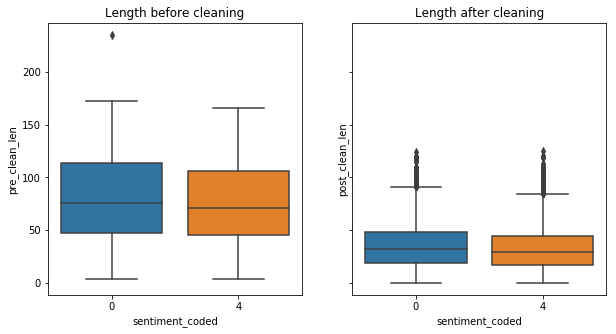

In [52]:
#plot length vs sentiment
fig, axes = plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
sns.boxplot(x="sentiment_coded", y="pre_clean_len",data=gen_df, ax=axes[0])
axes[0].set_title('Length before cleaning')
sns.boxplot(x="sentiment_coded", y="post_clean_len",data=gen_df, ax=axes[1])
axes[1].set_title('Length after cleaning')
plt.show()

It is observed that there is not much difference between negative and positive classes length

#### 3.1.2 Visualization using wordcloud for both positive words and negative words


WordCloud is a technique to show which words are the most frequent among the given text                                    
wordcloud libraray in python                                                                                              
wc = WordCloud(
            background_color="black",  # background color
            max_words=500,  # Show the maximum number of words
            font_path="D:/Software (learning) / Python/PyCharm/font/simsun.ttc",  # 
            min_font_size=15,
            max_font_size=50,
            width=400,
            height=860,
            mask=color_mask)

In [53]:
positive_tweets=pd.Series(pos_text.cleaned_text.values).str.cat(sep=' ')
negative_tweets=pd.Series(neg_text.cleaned_text.values).str.cat(sep=' ')


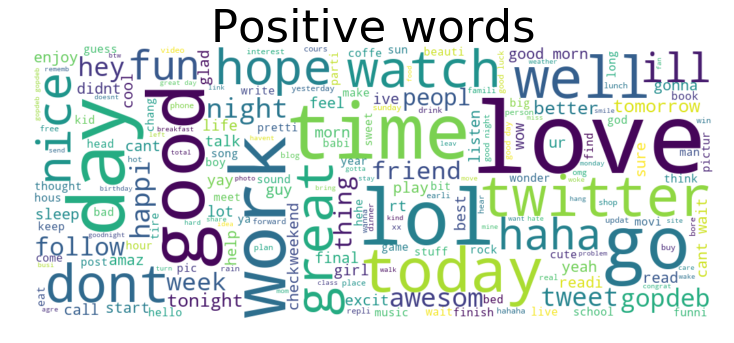

In [54]:
wordcloud = WordCloud(min_font_size=10,width=1000, height=400, background_color="white").generate(positive_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive words',{'fontsize':45})
plt.show()


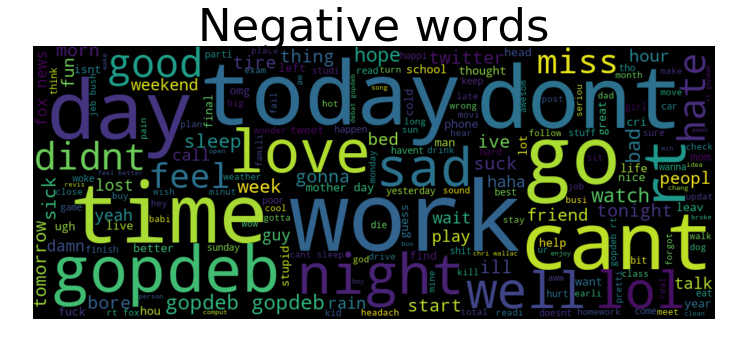

In [55]:
wordcloud = WordCloud(min_font_size=10,width=1000, height=400, background_color="black").generate(negative_tweets)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Negative words',{'fontsize':45})
plt.show()

From the wordcloud exploratory analysis.                                                                                   
The positive words that are used most frequently are today,love,good,work time.                                            
The negative words that are used frequently are sad,hate,miss,today.

In both the clouds we can also see some words that are root(obtained during stemming) gopdeb.
They are few words that are positive emotions like love,good,well but are  labeled as negative and this might effect the  testing accuracy
of the model trained with this discrepancies.

### 3.2 Visualize Elections_2019 dataset(canadian_elections_2019.csv)

The election data set can be analysed based on the party the tweets are pointing to.So we need to accumulate tweets based on parties.This analysis is based on the hashtags and handles that help us to approximate tweets corresponding to parties


Out of 6 political parties only 4 political parties will be analyzed since they were the only parties able to acquire more than 10 seat during the 2019 Canadian election. These parties include: Liberal, Conservative, NDP, Bloc Québécois 

In [56]:
#Function to get parties based on handles and hashtag in tweets
party_list=[]
party=''
for i in range(len(elec_df)):
    if(('conservative' in elec_df.clean_html[i]) or ('cpc' in elec_df.clean_html[i]) or ('andrew' in elec_df.clean_html[i]) or ('andrewscheer' in elec_df.clean_html[i])or ('scheer' in elec_df.clean_html[i])) and (('liberal' not in elec_df.clean_html[i]) and ('justin' not in elec_df.clean_html[i]) and ('trudeau' not in elec_df.clean_html[i]) and ('justintrudeau' not in elec_df.clean_html[i]) and ('lpc' not in elec_df.clean_html[i])) and (('ndp' not in elec_df.clean_html[i]) and ('jagmeet' not in elec_df.clean_html[i]) and ('democratic' not in elec_df.clean_html[i]) and ('singh' not in elec_df.clean_html[i])and('thejagmeetsingh' not in elec_df.clean_html[i]) )and (('bloc' not in elec_df.clean_html[i]) and ('quebecois' not in elec_df.clean_html[i]) and ('québécois'not in elec_df.clean_html[i]) and ('yfblanchet'not in elec_df.clean_html[i]) and ('blanchet'not in elec_df.clean_html[i])):
        party='conservative'
    elif (('conservative' not in elec_df.clean_html[i]) and ('cpc' not in elec_df.clean_html[i]) and ('andrew' not in elec_df.clean_html[i]) and ('scheer' not in elec_df.clean_html[i])and ('andrewscheer' not in elec_df.clean_html[i])) and (('liberal' in elec_df.clean_html[i]) or ('justin' in elec_df.clean_html[i]) or ('trudeau' in elec_df.clean_html[i]) or ('lpc' in elec_df.clean_html[i])or ('justintrudeau'  in elec_df.clean_html[i])) and (('ndp' not in elec_df.clean_html[i]) and ('jagmeet' not in elec_df.clean_html[i]) and ('democratic' not in elec_df.clean_html[i]) and ('democratic' not in elec_df.clean_html[i]) and('thejagmeetsingh' not in elec_df.clean_html[i]))and (('bloc' not in elec_df.clean_html[i]) and ('quebecois' not in elec_df.clean_html[i]) and ('québécois'not in elec_df.clean_html[i]) and ('yfblanchet'not in elec_df.clean_html[i]) and ('blanchet'not in elec_df.clean_html[i])):
        party='liberal'
    elif (('conservative' not in elec_df.clean_html[i]) and ('cpc' not in elec_df.clean_html[i]) and ('andrew' not in elec_df.clean_html[i]) and ('scheer' not in elec_df.clean_html[i])and ('andrewscheer' not in elec_df.clean_html[i])) and (('liberal' not in elec_df.clean_html[i]) and ('justin' not in elec_df.clean_html[i]) and ('trudeau'not in elec_df.clean_html[i]) and ('lpc' not in elec_df.clean_html[i]) and ('justintrudeau' not in elec_df.clean_html[i])) and (('ndp' not in elec_df.clean_html[i]) and ('jagmeet' not in elec_df.clean_html[i]) and ('democratic' not in elec_df.clean_html[i]) and ('democratic' not in elec_df.clean_html[i]) and('thejagmeetsingh' not in elec_df.clean_html[i])) and (('bloc' in elec_df.clean_html[i]) or ('quebecois' in elec_df.clean_html[i]) or ('québécois' in elec_df.clean_html[i]) or ('yfblanchet' in elec_df.clean_html[i]) or ('blanchet' in elec_df.clean_html[i])):
        party='Bloc Quebecois'
    elif (('conservative' not in elec_df.clean_html[i]) and ('cpc' not in elec_df.clean_html[i]) and ('andrew' not in elec_df.clean_html[i]) and ('scheer' not in elec_df.clean_html[i])and ('andrewscheer' not in elec_df.clean_html[i])) and (('liberal' not in elec_df.clean_html[i]) and ('justin' not in elec_df.clean_html[i]) and ('trudeau' not in elec_df.clean_html[i]) and ('lpc' not in elec_df.clean_html[i])and ('justintrudeau' not  in elec_df.clean_html[i])) and (('ndp' in elec_df.clean_html[i]) or ('jagmeet' in elec_df.clean_html[i]) or ('democratic' in elec_df.clean_html[i]) or ('democratic' in elec_df.clean_html[i])or ('thejagmeetsingh' in elec_df.clean_html[i]))and  (('bloc' not in elec_df.clean_html[i]) and ('quebecois' not in elec_df.clean_html[i]) and ('québécois'not in elec_df.clean_html[i]) and ('yfblanchet'not in elec_df.clean_html[i]) and ('blanchet'not in elec_df.clean_html[i])):
        party='ndp'
    else:
        party='none'
    party_list.append(party)

In [57]:
elec_df['political_party']=party_list
elec_df.head()

,sentiment,negative_reason,text,pre_clean_len,sentiment_coded,clean_html,cleaned_text,post_clean_len,political_party
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",285,0,@rosiebarton so instead of your suggestion how...,instead suggest agre canadian women trust andr...,136,conservative
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",125,4,#allwomanspacewalk its real!@spacestation #cit...,allwomanspacewalk real cityofto onpoli cdnpoli...,54,none
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",131,0,#brantford its going to cost you 94 billion fo...,brantford go cost 94 billion next 4 year ask j...,74,liberal
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",116,4,#canada #canadaelection2019 #canadavotes decid...,canada canadaelection2019 canadavot decid help,47,none
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",309,0,#canada #taxpayers are sick & tired of having ...,canada taxpay sick tire hard earn donat corpor...,159,liberal


In [58]:
elec_df.groupby(['political_party','sentiment']).count().text

political_party  sentiment
Bloc Quebecois   Negative       9
                 Positive       4
conservative     Negative     325
                 Positive     142
liberal          Negative     157
                 Positive     137
ndp              Negative      40
                 Positive     102
none             Negative     475
                 Positive     742
Name: text, dtype: int64

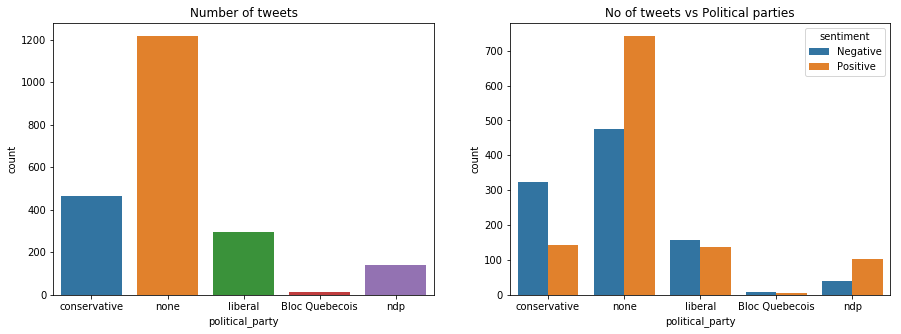

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='political_party',data=elec_df, ax=ax1)
ax1.set_title('Number of tweets')

sns.countplot(x='political_party',hue='sentiment',data=elec_df, ax=ax2)
ax2.set_title('No of tweets vs Political parties')

plt.show()

In [60]:
tweet_party_sum=elec_df.groupby('political_party').political_party.count().values
tweet_party_sum

array([  13,  467,  294,  142, 1217], dtype=int64)

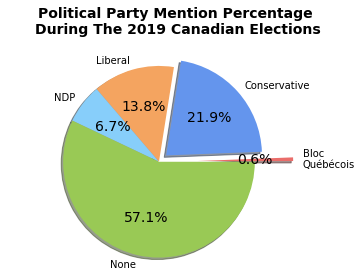

In [61]:
# Pie chart.
party_titles = ['Bloc \nQuébécois','Conservative','Liberal',  'NDP' ,'None']
col = ['#EA6D6A', '#6495ED', '#F4A460', '#87CEFA', '#99C955']
patch, text, auto = plt.pie(tweet_party_sum, labels = party_titles, colors = col, shadow = True, autopct = '%1.1f%%', explode = (0.4, 0.1, 0, 0.0, 0.0))
plt.title('Political Party Mention Percentage \nDuring The 2019 Canadian Elections', fontsize = 14, fontweight = 'bold', y = 1.05)
for i in range(0, len(auto)): auto[i].set_fontsize(14)

plt.axis('equal')
plt.show()

It is observed that majority of tweets are either general comments about elections(calling people to vote, suggestions to create awareness among people about on going issues, various riots and threats, etc.,) or Refering to more than two parties. (Many tweets are refered to 2 or more parties which cannot be considered under 1 party)

42.9% of tweets are party specific tweets. Now we analyse the tweets excluding the none category, party wise based on sentiment

Party having maximum negative tweets is conservative party(69.5%) relative to the total tweets(467) related to the party followed by Blocquebecois with (69.2%) and total(13)
Party having minimum negative tweets is NDP party (28%) relative to the total tweets(142) that belong to NDP followed by Liberal(53.4%). 

From this ratio, we can see that People are positive towards NDP party, neutral to Liberal party and negative towards consevative party . But since the number of tweets are quite less for NDP, we can say that liberal party has more followers than NDP, and out of the three parties liberal party has maximum (46.6%) of positive tweets which resulted in winning of this party in 2019 elections

## 4.Model preparation 

### 4.1 Feature Extraction-Text

A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs.                                                                                           
Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.This is called feature extraction or feature encoding.

Models for Feature Extraction:                                                                                            
1.Word Frequency                                                                                                          
2.TF-IDF                                                                                                                  



#### 4.1.1 Bag of words Model

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.                 
Bag of Words is a word frequency algorithm that counts how many times a word appears in a document. We can use this counts to implement a model in textual analysis of any documents like news articles and tweets.

In [62]:
#Bag of words (from sklearn.feature_extraction.text import CountVectorizer)
def bag(X):
    vectorizer1 = CountVectorizer(max_features =5000)
    X = vectorizer1.fit_transform(X)
    return(X)

#### 4.1.2 TF-IDF

A problem with scoring word frequency is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content” to the model as rarer but perhaps domain specific words.

One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

This approach to scoring is called Term Frequency – Inverse Document Frequency, or TF-IDF  where:

Term Frequency: is a scoring of the frequency of the word in the current document.                                        
Inverse Document Frequency: is a scoring of how rare the word is across documents.                                         
The scores are a weighting where not all words are equally as important or interesting.                                                                    
The scores have the effect of highlighting words that are distinct (contain useful information) in a given document.

In [63]:
#TF-IDF(from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf(X):
    vectorizer2 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features=5000)
    X = vectorizer2.fit_transform(X)
    return(X)

### 4.2 Splitting the Dataset

Here, we use scikit-learn's train_test_split funtion in order to define the training and test sets of the General tweet dataset that will be used for sentiment model training. The training data will use 70% of the original dataset, whereas the remaining 30% will be used for the test set. Thus, X represents the tweets text, Y represents the tweet's sentiment, and train/test represents either training or test sets.

Note that y is coded to an intger type to avoid errors .

In [64]:
#Function for Dataset
def model_(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200, test_size=0.3)
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    print('Report for {}:\n\n {}'.format(model,classification_report(y_test,predictions)))
    return(predictions,y_test)

### 4.3 Algorithms/Models

Now that the data set is ready for model implementation, we apply various algorithms and compare the accuracy score to select the best model and the best model will be applied on election data to predict the sentiment of the tweets

We have choosen various models for comparision

1. Logistic Regression : Since it is incredibly easy to implement and very efficient to train
2. KNN : Very simple implementation, requires less or no training as it is based on distance between neighbours
3. Random Forest : Training a large number of deep trees can have high computational costs and memory usage
4. Decision tree classifier: A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion
5. SVM: SVM works relatively well when separation between classes is clear and more effective in high dimensional spaces
6. XG boost: It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 
7. Naive bayes: It requires less training data. It is highly scalable. Can handle both discrete and continuous data

In [65]:
#Function that defines all models
def allmodels(X,y):
    
    #Splitting into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200, test_size=0.3)
    
    #Applying logistic regression
    model=LogisticRegression()
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_logr=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for Logistic regression model is {}%'.format(acc_logr))
    
    #Applying KNN classifier
    model=KNeighborsClassifier()
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_knn=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for KNN model is {}%'.format(acc_knn))
    
    #Applying random forest classifier
    model=RandomForestClassifier() 
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_randomf=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for Random Forest model is {}%'.format(acc_randomf))
    
    #Applying decission tree classifier
    model=DecisionTreeClassifier() 
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_decisiont=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for Decision tree model is {}%'.format(acc_decisiont))
    
    #Applying SVM
    model=LinearSVC() 
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_svm=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for SVM model is {}%'.format(acc_svm))
    
    #Applying XGboost
    model=xgb.XGBClassifier() 
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    acc_xgbost=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for XGboost model is {}%'.format(acc_xgbost))
    
    #Applying naive bayes
    model=GaussianNB()
    model.fit(X_train.toarray(), y_train)
    predictions=model.predict(X_test.toarray())
    acc_nb=round(accuracy_score(y_test,predictions)*100,2)
    print('Accuracy for naive bayes model is {}%'.format(acc_nb))
    
    return(acc_logr,acc_knn,acc_randomf,acc_decisiont,acc_svm,acc_xgbost,acc_nb)

## 5.Model Implementation

### 5.1 General tweets

#### 5.1.1 Use bag-of-words for feature extraction and all models implemented

In [66]:
#X set of text
#y set of class/sentiment
X_fdata=gen_df['cleaned_text']
y=gen_df['sentiment_coded']

In [67]:
#EXtract Features using bag of words model(input-x_fdata) and get reduced features
X1=bag(X_fdata)

In [68]:
#Models implementations
acc_logr1,acc_knn1,acc_randomf1,acc_decisiont1,acc_svm1,acc_xgbost1,acc_nb1=allmodels(X1,y)

Accuracy for Logistic regression model is 73.71%
Accuracy for KNN model is 67.03%
Accuracy for Random Forest model is 71.71%
Accuracy for Decision tree model is 68.63%
Accuracy for SVM model is 73.34%
Accuracy for XGboost model is 72.15%
Accuracy for naive bayes model is 60.47%


#### 5.1.2 Use TF-IDF for feature extraction and all models implemented

In [69]:
#EXtract Features using TF-IDF model(input-x_fdata) and get reduced features
X2=tfidf(X_fdata)

In [70]:
#Models Implementation
acc_logr2,acc_knn2,acc_randomf2,acc_decisiont2,acc_svm2,acc_xgbost2,acc_nb2=allmodels(X2,y)

Accuracy for Logistic regression model is 73.32%
Accuracy for KNN model is 65.72%
Accuracy for Random Forest model is 71.65%
Accuracy for Decision tree model is 68.65%
Accuracy for SVM model is 72.95%
Accuracy for XGboost model is 72.15%
Accuracy for naive bayes model is 60.16%


It was observed from the training of the general tweets the model with best accuracies are obtained.                       
Machine learning classification algorithm :Logistic Regression                                                            
Feature Extraction:Both bag of words and TF-IDF give same almost accuracy (Bag-of words is choosen)                             

#### 5.1.3 Final Implmentation on  general tweets set with best models

In [1957]:
#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=200, test_size=0.3)

#Applying logistic regression
best_model=LogisticRegression()
best_model.fit(X_train, y_train)
best_predictions=best_model.predict(X_test)
print('Accuracy of the model on generic tweets data is {}%'.format(round(accuracy_score(y_test,best_predictions)*100,2)))

Accuracy of the model on generic tweets data is 73.71%


### 5.2 Elections 2019 data Set

In [1959]:
# election data set is tested using the same model
#Assigning feature and target data
X_data=elec_df['cleaned_text']

y1=elec_df['sentiment_coded']

In [1960]:
#feature extraction
X3=bag(X_data)

#### 5.2.1Comparision of accuracy of Election data set with best model(trained with generic tweets) and model(trained on electronic dataset)

In [1963]:
#Model implmentation on the complete election data without train and test split using  best model that was trained with generic tweets,
#Hence no fitting is needed again on election data and so no splitting.
predictions=best_model.predict(X3)
print('Accuracy of the above best model on election data is {}%'.format(round(accuracy_score(y1,predictions)*100,2)))

Accuracy of the above best model on election data is 47.68%


In [1962]:
#Model implementation on the election data (not best model)
#Model-by splitting the data to training and testing set(both from election data) and checking accuracy on testing set

model=LogisticRegression()
pred_,y_test=model_(model,X3,y1)

Report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):

               precision    recall  f1-score   support

           0       0.64      0.69      0.66       274
           4       0.75      0.71      0.73       366

   micro avg       0.70      0.70      0.70       640
   macro avg       0.70      0.70      0.70       640
weighted avg       0.70      0.70      0.70       640



It is to be noted that accuracy is 70% of the election data ( not on  the best model),whereas the accuracy of the elction data on the best model was just 47.68%.
One of the reasons can be that trainig with (general data set ) might have different frequency words than the election data set.

But it is still preferable to use best model trained with generic data as it had big sample size in comparision to election data set.

### 5.3 Negative Tweets of Election data set

#### Model implementation on X=negative sentiment tweets and prediction of Y= 'reason for the negative rating'

In [1977]:
negative_df=elec_df[['negative_reason','cleaned_text']][elec_df['sentiment']=='Negative']
negative_df.head()

,negative_reason,cleaned_text
0,Women Reproductive right and Racism,instead suggest agre canadian women trust andr...
2,Economy,brantford go cost 94 billion next 4 year ask j...
4,Economy,canada taxpay sick tire hard earn donat corpor...
5,Others,canadavotes2019 elxn43 cdnpoli fact blastfromt...
8,Others,chooseforward cdnpoli elxn43canada dont make a...


In [1966]:
negative_df['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

In [1967]:
negative_df.groupby('negative_reason').negative_reason.count()

negative_reason
Climate Problem                         41
Economy                                 51
Healthcare                               5
Healthcare and Marijuana                 4
Others                                 364
Privilege                               12
Scandal                                270
Separation                              16
Tell lies                              198
Women Reproductive right and Racism     45
Name: negative_reason, dtype: int64

They are many classes in the y-labels so we need to do Feature Engineering

#### 5.3.2 Feature Engineering 

Combine Health and Healthcare and Marijuana  as they belong as one class                                                   
Combine Scandal and Tell lies                                                                                              
Combine Separation and privilege as (Separation of privilege, also called privilege separation)

In [1970]:
negative_df['negative_reason'][negative_df['negative_reason']=='Healthcare']='Healthcare and Marijuana'
negative_df['negative_reason'][negative_df['negative_reason']=='Tell lies']='Scandal'
negative_df['negative_reason'][negative_df['negative_reason']=='Separation']='Privilege'
negative_df['negative_reason'].unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Privilege', 'Climate Problem',
       'Healthcare and Marijuana'], dtype=object)

In [1971]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column
negative_df['negative_reason_coded']=label_encoder.fit_transform(negative_df['negative_reason'])

negative_df.head()

,negative_reason,cleaned_text,negative_reason_coded
0,Women Reproductive right and Racism,instead suggest agre canadian women trust andr...,6
2,Economy,brantford go cost 94 billion next 4 year ask j...,1
4,Economy,canada taxpay sick tire hard earn donat corpor...,1
5,Others,canadavotes2019 elxn43 cdnpoli fact blastfromt...,3
8,Others,chooseforward cdnpoli elxn43canada dont make a...,3


In [1972]:
negative_df['negative_reason'].value_counts()

Scandal                                468
Others                                 364
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Privilege                               28
Healthcare and Marijuana                 9
Name: negative_reason, dtype: int64

In [1974]:
#Do Feature extraction using bag of words
feature_data=bag(negative_df['cleaned_text'])
target_data=negative_df['negative_reason_coded']

In [1975]:
# Model implmentation using all models of classification( without train and test split)

logr_acc,knn_acc,randomf_acc,decisiont_acc,acc_svm,acc_xg,acc_nb=allmodels(feature_data,target_data)

Accuracy for Logistic regression model is 56.29%
Accuracy for KNN model is 36.75%
Accuracy for Random Forest model is 54.64%
Accuracy for Decision tree model is 58.28%
Accuracy for SVM model is 56.29%
Accuracy for XGboost model is 58.94%
Accuracy for naive bayes model is 42.38%


In [1976]:
#Model Implementation splitting the data to training and testing set and checking accuracy on testing set
lr=LogisticRegression()
predic_,y_testing=model_(lr,feature_data,target_data)

Report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False):

               precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.86      0.33      0.48        18
           2       0.00      0.00      0.00         4
           3       0.45      0.71      0.55        98
           4       1.00      0.12      0.22         8
           5       0.66      0.57      0.61       154
           6       1.00      0.27      0.43        11

   micro avg       0.56      0.56      0.56       302
   macro avg       0.71      0.32      0.38       302
weighted avg       0.63      0.56      0.55       302



## 6. Results

### 6.1 Generic data set

In [2042]:
generic_results=pd.DataFrame(np.array([['BOW','BOW','BOW','BOW','BOW','BOW','BOW','TF-IDF','TF-IDF','TF-IDF','TF-IDF','TF-IDF','TF-IDF','TF-IDF'],['LR','KNN','RF','DT','SVM','XG','NB','LR','KNN','RF','DT','SVM','XG','NB']]).T, columns=['vectorizer','model'])
generic_results['accuracy']=[acc_logr1,acc_knn1,acc_randomf1,acc_decisiont1,acc_svm1,acc_xgbost1,acc_nb1,acc_logr2,acc_knn2,acc_randomf2,acc_decisiont2,acc_svm2,acc_xgbost2,acc_nb2]
generic_results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
vectorizer,BOW,BOW,BOW,BOW,BOW,BOW,BOW,TF-IDF,TF-IDF,TF-IDF,TF-IDF,TF-IDF,TF-IDF,TF-IDF
model,LR,KNN,RF,DT,SVM,XG,NB,LR,KNN,RF,DT,SVM,XG,NB
accuracy,73.71,67.03,71.69,68.48,73.34,72.15,60.47,73.71,67.03,71.38,68.72,73.34,72.15,60.47


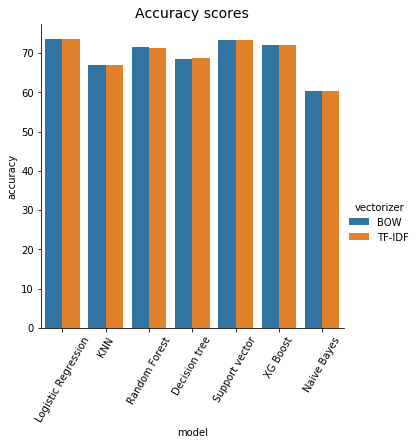

In [2043]:
acc_chart=sns.factorplot(x='model', y='accuracy', hue='vectorizer', data=generic_results, kind='bar')
acc_chart.set_xticklabels(['Logistic Regression','KNN','Random Forest','Decision tree','Support vector','XG Boost','Naive Bayes'],rotation=60)
plt.title('Accuracy scores', fontsize=14)
plt.show()

### 6.2 Election_2019 Data set

In [2046]:
results=pd.DataFrame(np.vstack([np.array(y1),predictions,np.array(elec_df['political_party'])]).T,columns=['Actual','Predicted','Party'])
results['True/False']=['True' if results['Actual'][i]==results['Predicted'][i] else 'False' for i in results.index ]
results.head()

,Actual,Predicted,Party,True/False
0,0,4,conservative,False
1,4,4,none,True
2,0,4,liberal,False
3,4,4,none,True
4,0,4,liberal,False


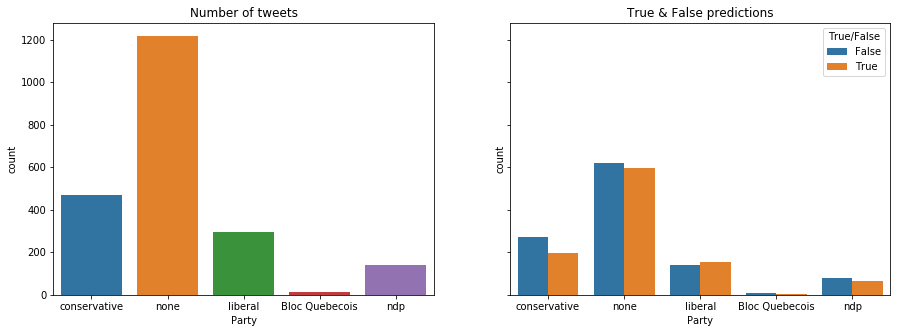

In [2047]:
fig, (a1, a2) = plt.subplots(1,2,figsize=(15,5),sharex=True,sharey=True)

sns.countplot(x='Party',data=results, ax=a1)
a1.set_title('Number of tweets')

sns.countplot(x='Party',hue='True/False',data=results, ax=a2)
a2.set_title('True & False predictions')

plt.show()

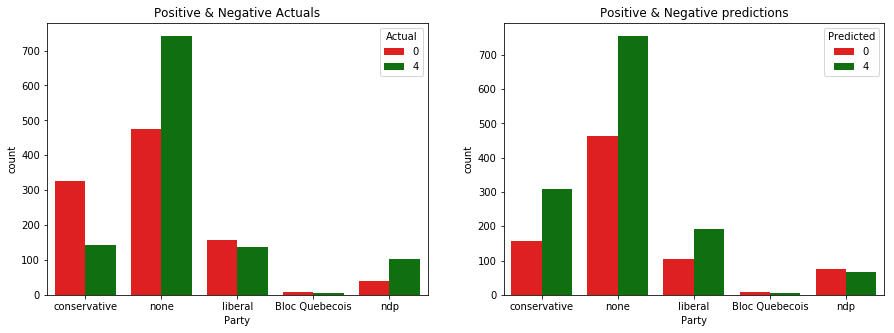

In [2048]:
fig, (a3, a4) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Party', hue='Actual', data=results, palette=['red','green'], ax=a3)
a3.set_title('Positive & Negative Actuals')

sns.countplot(x='Party', hue='Predicted', data=results, palette=['red','green'], ax=a4)
a4.set_title('Positive & Negative predictions')

plt.show()

The accuracy of the best model of generic tweets on election data set is 47.68% So the prediction is very ambiguous. This NLP model cannot be relayed upon for predicting the winner of the election but this can be used to find out the people's opinion about a party to some extent, if they are positive or negative towards its government.

From exploratory data analysis section, positive tweets to the total party tweets is in ratio of, Conservative: 30.4%, Liberal: 46.5%, NDP:71.83%,Blocquebecois:30.7% which shows people are negative towards conservative party and neutral to liberal. Though the positivity is more towards NDP, number of tweets are very less for NDP which indicates less followers. So, liberal has probability of winning which was ture as per real senario of 2019 elections


By plotting word clouds and deep learning algorithms we can also check what is the root cause of positivity or negativity. We can improve accuracy by using N-gram features, parameters tuning which is done in bonus section.

Further, not using stop words also resulted in increase of accuracy approximately by 2%. In the trial of removing stop words, there is a chance that some important contributers that help in sentiment prediction will be removed. But keeping in mind that analysing bulk data is computationally time consuming we remove stop words at the cost of trade-off in accuracy

### 6.3  Negative   tweet from Election_2019 Data set¶

In [2050]:
elec_results=pd.DataFrame(y_testing)
elec_results['predicted']=list(predic_)
elec_results['reason']=label_encoder.inverse_transform(y_testing)
elec_results['predicted_reason']=label_encoder.inverse_transform(elec_results['predicted'])
elec_results['True/False']=['True' if (elec_results['negative_reason_coded'][i]==elec_results['predicted'][i]) else 'False' for i in elec_results.index]
elec_results.head()

,negative_reason_coded,predicted,reason,predicted_reason,True/False
1125,5,3,Scandal,Others,False
425,5,3,Scandal,Others,False
1550,5,3,Scandal,Others,False
1035,6,5,Women Reproductive right and Racism,Scandal,False
950,0,3,Climate Problem,Others,False


In [2051]:
elec_results.groupby(['reason','True/False']).count().predicted

reason                               True/False
Climate Problem                      False          7
                                     True           2
Economy                              False         12
                                     True           6
Healthcare and Marijuana             False          4
Others                               False         28
                                     True          70
Privilege                            False          7
                                     True           1
Scandal                              False         66
                                     True          88
Women Reproductive right and Racism  False          8
                                     True           3
Name: predicted, dtype: int64

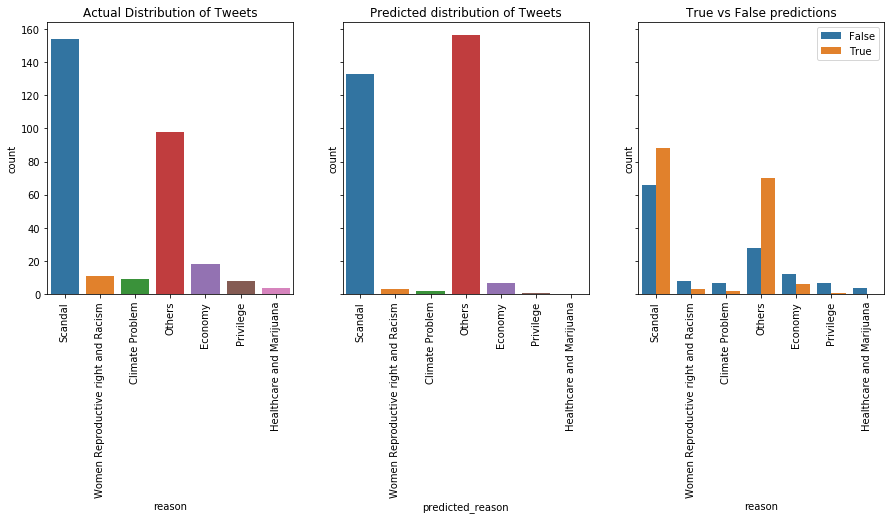

In [2052]:
fig, (r1, r2, r3) = plt.subplots(1,3,figsize=(15,5),sharey=True)

sns.countplot(x='reason',data=elec_results, ax=r1)
r1.set_xticklabels(r1.get_xticklabels(),rotation=90)
r1.set_title('Actual Distribution of Tweets')

sns.countplot(x='predicted_reason',data=elec_results,order=elec_results['reason'].unique(), ax=r2)
r2.set_xticklabels(r2.get_xticklabels(),rotation=90)
r2.set_title('Predicted distribution of Tweets')

sns.countplot(x='reason',hue='True/False',data=elec_results, ax=r3)
r3.set_xticklabels(r3.get_xticklabels(),rotation=90)
r3.set_title('True vs False predictions')
r3.legend(loc=1)

plt.show()

In [2055]:
elec_results['tweet']=elec_df.cleaned_text[elec_results.index]
elec_results[elec_results.reason=='Privilege']

,negative_reason_coded,predicted,reason,predicted_reason,True/False,tweet
1157,4,5,Privilege,Scandal,False,canadian concern power non canadian peopl usa ...
702,4,5,Privilege,Scandal,False,carpet bomb bullshi albertan put scorn onslaug...
162,4,5,Privilege,Scandal,False,honestli let quxc3xa9bec separ let western can...
548,4,1,Privilege,Economy,False,ye care underhand backroom deal let hear conse...
1695,4,4,Privilege,Privilege,True,upon time quxc4x97bec alberta alli feder seces...
674,4,3,Privilege,Others,False,everyon kiss quebec ass want separ care let el...
823,4,5,Privilege,Scandal,False,backped finest mr perfectpublicspeak put foot ...
647,4,5,Privilege,Scandal,False,see emmett right third sentenc falsehood drive...


In [2057]:
elec_results[elec_results.reason=='Healthcare and Marijuana']

,negative_reason_coded,predicted,reason,predicted_reason,True/False,tweet
536,2,5,Healthcare and Marijuana,Scandal,False,next prime minist canada dentalcar that bad pa...
1710,2,5,Healthcare and Marijuana,Scandal,False,individu medic right freedom strip away vote p...
993,2,3,Healthcare and Marijuana,Others,False,anyth govt grant ixe2x80x99m gonna appli test ...
1317,2,3,Healthcare and Marijuana,Others,False,everi provinc forc sell trudeau weed lose mone...


 IT can be observed that if the category have more entries, true predictions are more than the categories with less entries. This can be due to lack of sufficient number of samples in each category.

It can be seen that Health and Marijuana has very less entries and those are classified as scandal and others which has more entries. Basic ML models cannot distinguish the polarity and context of the text and thus leads to wrong prediction

## 7. Bonus

### 7.1.Exploratory Analysis

#### Sentiment distribution(positive and Negative)  for Each Party(Conservative,Liberal,NDP,Blocquebecois)

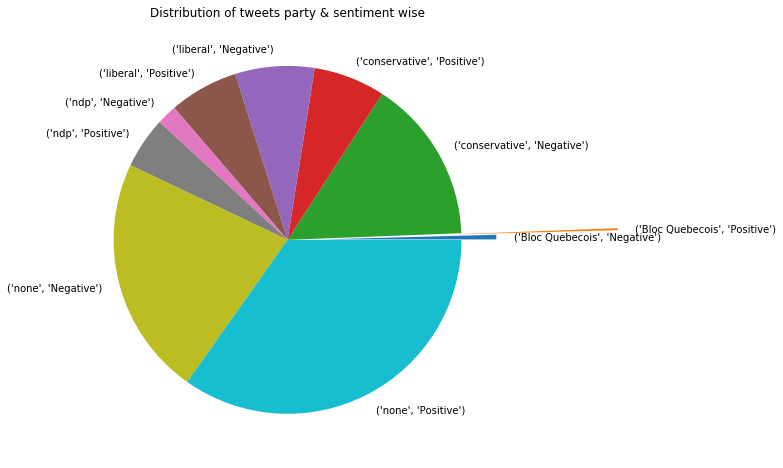

In [2078]:
plt.figure(figsize=(8,8))
abc=elec_df.groupby(['political_party','sentiment']).count().text
plt.pie(abc,labels=abc.index,explode = (0.2, 0.9, 0, 0.0, 0.0,0,0,0,0,0))
plt.title('Distribution of tweets party & sentiment wise')
plt.show()

#### Word cloud on Election data

In [2079]:
pos_e=[]
neg_e=[]
for i in elec_df.index:
    if elec_df['sentiment'][i]=='Negative':
        neg_e.append(elec_df['cleaned_text'][i])
    else:
        pos_e.append(elec_df['cleaned_text'][i])
        
pos_etweet_con=pd.Series(pos_e).str.cat(sep=' ')
neg_etweet_con=pd.Series(neg_e).str.cat(sep=' ')

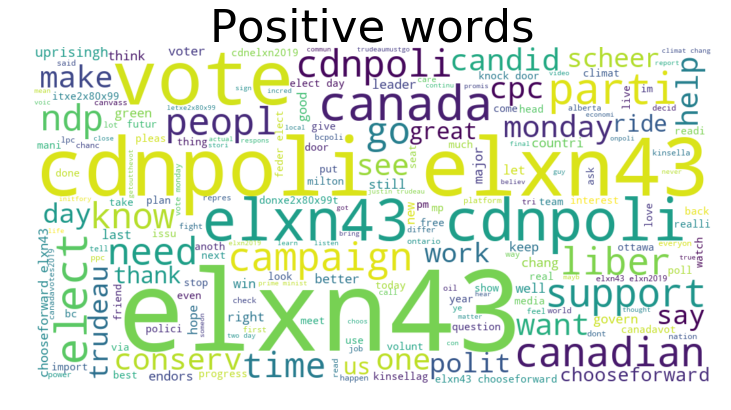

In [2087]:
wordcloud = WordCloud(min_font_size=10,width=1000, height=500, background_color="white").generate(pos_etweet_con)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive words',{'fontsize':45})
plt.show()


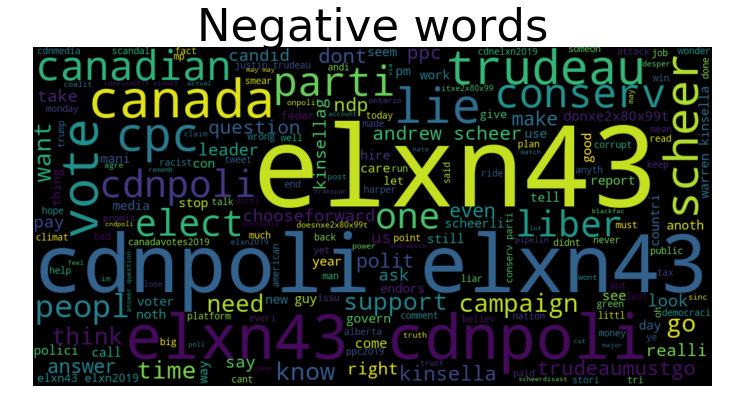

In [2086]:
wordcloud = WordCloud(min_font_size=10,width=1000, height=500, background_color="black").generate(neg_etweet_con)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Negative words',{'fontsize':45})
plt.show()


From the word cloud we can see that most common positive words are elxn43,cdnpoli,vote.
Frequent negative words are elnx43,canada,cdnpoli.                                                                         
This makes it difficult to classify the election data based on the frequency of words  as these are general words that are actually hashtags or general words people used when tweeting.                                                             
Word cloud is not the correct analyisis for election data to come to a basic conclusion.                                   
And bag of words  as feature extraction method is not the best method in this case.                                       

### 7.2 Feature EXtraction

BWord embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words

Basic methods :                                                                                                            
1.one-hot encoding(count vectorizing)(BOW)                                                                                
2.TF-IDF                                                                                                                  
Neural Methods :                                                                                                         
1.Word2Vec is the first neural embedding model                                                                            
a.One-word context                                                                                                       
b.Multi-word context                                                                                                      
c.Skip-gram model                                                                                                         
2.GloVe (Glove: Global Vectors for Word Representation)                                                                   
3.FastText (Enriching Word Vectors with Subword Information)                                                              
4.Poincaré embeddings (Poincaré Embeddings for Learning Hierarchical Representations)                                      

#### Method used: Word2Vec

In [2178]:
#word2vec generates vector for each word. 
#Hence we avgerage the vectors of all words in a sentance to 1 vector that represents entire sentance

def buildWordVector(text, size):
    
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    if text=='':
        vec=vec
    else:
        text = text.split(' ')
        text=text[:-1]
       
        for word in text:
            
           
            vec += model[word].reshape((1, size))
            count += 1.
        if count != 0:
            vec /= count
    return vec

In [2179]:
# we need to pass splitted sentences to the model
tokenized_sentences = [sentence.split() for sentence in gen_df['cleaned_text']]
model = word2vec.Word2Vec(tokenized_sentences,size=100, min_count=1)
#applying word2vec for generic tweets data set
X4 = np.concatenate([buildWordVector(z, 100) for z in gen_df['cleaned_text']])
#Implementing logistic regression model on general tweets data
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X4, y, random_state=200, test_size=0.3)
m_gen=LogisticRegression()
m_gen.fit(Xg_train,yg_train)
pred_g=m_gen.predict(Xg_test)
print('Accuracy on generic tweets data is {}%'.format(round(accuracy_score(pred_g,yg_test)*100,2)))

Accuracy on generic tweets data is 70.44%


Accuracy when compared to feature extraction (with bag of words ) was 73.71% but here the accuracy has decreased to 70.26%.

In [2181]:
#Splitting the election tweets into individual words for implementing word2vec
tokenized_sentences_elec = [sentence.split() for sentence in elec_df['cleaned_text']]
model = word2vec.Word2Vec(tokenized_sentences_elec, size=100, min_count=1)
y1_elec=elec_df['sentiment_coded']
#Implementing the above model on elections data set and comparing accuracy
X_elec = np.concatenate([buildWordVector(z, 100) for z in elec_df['cleaned_text']])
pred_elec=m_gen.predict(X_elec)
print('Accuracy of same model on elections tweets data is {}%'.format(round(accuracy_score(pred_elec,y1_elec)*100,2)))

Accuracy of same model on elections tweets data is 47.21%


The accuracy for election data using this word2Vec gave almost same accuracy as using bag of words

#### Method used: N-grams

In [2183]:
#Using N-grams feature in vectorizer
vector_n = CountVectorizer(max_features =5000,ngram_range=(1,3))
X_n = vector_n.fit_transform(gen_df['cleaned_text'])

#Implementing logistic regression model on general tweets data
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y, random_state=200, test_size=0.3)
lr_n=LogisticRegression()
lr_n.fit(Xn_train,yn_train)
pred_n=lr_n.predict(Xn_test)
print('Accuracy on generic tweets data is {}%'.format(round(accuracy_score(pred_n,yn_test)*100,2)))

Accuracy on generic tweets data is 73.94%


The accuracy applying generic tweets data  (increased accuracy from bag of words(best model) 73.71% to (N-grams)73.94%)

In [2185]:
#Splitting the election tweets into individual words for implementing N-grams
X_nelec = vector_n.fit_transform(elec_df['cleaned_text'])

#Implementing the above model on elections data set and comparing accuracy
pred_nelec=lr_n.predict(X_nelec)
print('Accuracy of same model on elections tweets data is {}%'.format(round(accuracy_score(pred_nelec,y1_elec)*100,2)))

Accuracy of same model on elections tweets data is 49.13%


The accuracy applying election tweets data (increased accuracy from bag of words(best model) 47.68% to (N-grams)49.13%)

## 7.3 Hyperparameter tuning

On the best model which was Logistic regression using bag of words, we perform hyper parameter tuning to check the variation in accuracy if any. Hyperparameter tuning is done on negative tweets of elections data

In [2186]:
param_grid={'C' :(0.001,0.01,0.05,0.1,0.5,1,5,10,100,1000),'solver' : ['newton-cg','sag', 'saga','lbfgs']}

lr = LogisticRegression(random_state=200)

random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1, verbose=True)

random_result = random.fit(feature_data,target_data)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished


In [2187]:
print('Best score is {}%:'.format(round(random_result.best_score_*100,2)))
print('Best parameters are {}:'.format(random_result.best_params_))

Best score is 57.65%:
Best parameters are {'solver': 'sag', 'C': 0.5}:


It is observed that by hyperparameter tuning, the accuracy of the model is increased by 2%.(56% to 57.65%) If not for accuracy, it is always a best practice to tune the parameters and model with best parameters